In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,year,week_no,avg_temp,avg_rainfall,Noofrainydays,avg_humidity,dengue_cases,avg_min_temp,avg_max_temp,HI,CI,BI
0,2015,1,23,0,0,65,8,17,30,3.88,10.50,3.8
1,2015,2,24,7,5,75,4,20,28,3.00,27.20,2.0
2,2015,3,24,0,0,65,0,19,29,3.00,1.00,0.0
3,2015,4,24,2,3,66,2,18,29,3.00,5.09,4.0
4,2015,5,25,0,0,63,9,18,31,4.00,4.39,4.0


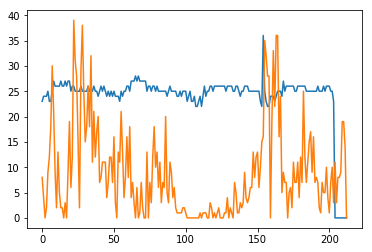

<Figure size 1152x576 with 0 Axes>

In [4]:
newData =  data.drop(['year', 'week_no'], axis=1)
newData.avg_temp.plot()
newData.dengue_cases.plot()
plt.figure(figsize=(16, 8))
plt.show()

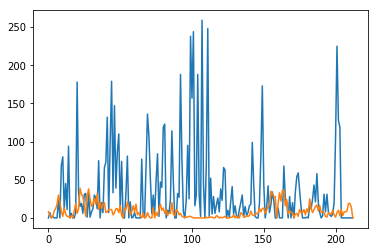

<Figure size 1152x576 with 0 Axes>

In [5]:
newData.avg_rainfall.plot()
newData.dengue_cases.plot()
plt.figure(figsize=(16, 8))
plt.show()

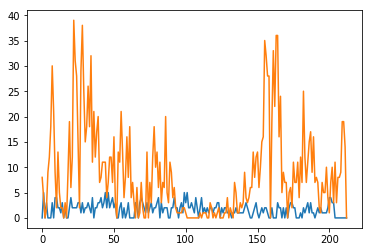

<Figure size 1152x576 with 0 Axes>

In [6]:
newData.Noofrainydays.plot()
newData.dengue_cases.plot()
plt.figure(figsize=(16, 8))
plt.show()

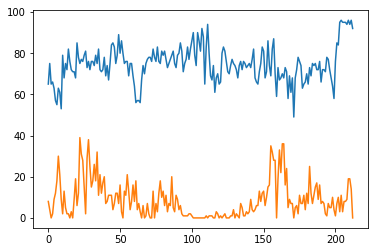

<Figure size 1152x576 with 0 Axes>

In [7]:
newData.avg_humidity.plot()
newData.dengue_cases.plot()
plt.figure(figsize=(16, 8))
plt.show()

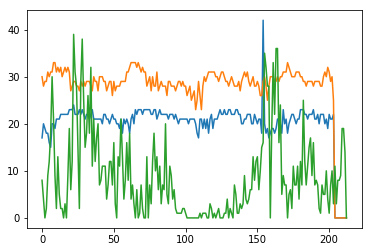

<Figure size 1152x576 with 0 Axes>

In [8]:
newData.avg_min_temp.plot()
newData.avg_max_temp.plot()
newData.dengue_cases.plot()
plt.figure(figsize=(16, 8))
plt.show()

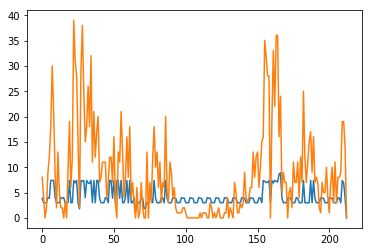

<Figure size 1152x576 with 0 Axes>

In [9]:
newData.HI.plot()
newData.dengue_cases.plot()
plt.figure(figsize=(16, 8))
plt.show()

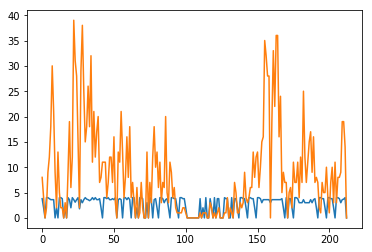

<Figure size 1152x576 with 0 Axes>

In [10]:
newData.BI.plot()
newData.dengue_cases.plot()
plt.figure(figsize=(16, 8))
plt.show()

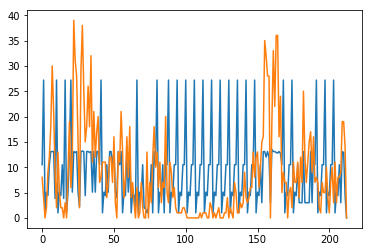

<Figure size 1152x576 with 0 Axes>

In [11]:
newData.CI.plot()
newData.dengue_cases.plot()
plt.figure(figsize=(16, 8))
plt.show()

In [12]:
newData['pred'] = newData.dengue_cases.shift(-1)
newData.head()

,avg_temp,avg_rainfall,Noofrainydays,avg_humidity,dengue_cases,avg_min_temp,avg_max_temp,HI,CI,BI,pred
0,23,0,0,65,8,17,30,3.88,10.50,3.8,4.0
1,24,7,5,75,4,20,28,3.00,27.20,2.0,0.0
2,24,0,0,65,0,19,29,3.00,1.00,0.0,2.0
3,24,2,3,66,2,18,29,3.00,5.09,4.0,9.0
4,25,0,0,63,9,18,31,4.00,4.39,4.0,12.0


In [13]:
values = newData.values
values = values.astype('float32')
values

array([[23.  ,  0.  ,  0.  , ..., 10.5 ,  3.8 ,  4.  ],
       [24.  ,  7.  ,  5.  , ..., 27.2 ,  2.  ,  0.  ],
       [24.  ,  0.  ,  0.  , ...,  1.  ,  0.  ,  2.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., 12.9 ,  3.7 , 14.  ],
       [ 0.  ,  0.  ,  0.  , ...,  4.39,  4.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,   nan]], dtype=float32)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
scaled = pd.DataFrame(scaled)
scaled.head(4)

,0,1,2,3,4,5,6,7,8,9,10
0,0.638889,0.000000,0.0,0.340425,0.205128,0.404762,0.909091,0.435955,0.386029,0.95,0.102564
1,0.666667,0.027027,1.0,0.553191,0.102564,0.476190,0.848485,0.337079,1.000000,0.50,0.000000
2,0.666667,0.000000,0.0,0.340425,0.000000,0.452381,0.878788,0.337079,0.036765,0.00,0.051282
3,0.666667,0.007722,0.6,0.361702,0.051282,0.428571,0.878788,0.337079,0.187132,1.00,0.230769


In [15]:
def ts(new_data, look_back = 60, pred_col = 1):
    t = new_data.copy()
    t['id'] = range(1, len(t)+1)
    t = t.iloc[:-look_back, :]
    t.set_index('id', inplace = True)
    pred_value = new_data.copy()
    pred_value = pred_value.iloc[look_back:, pred_col]
    pred_value.columns = ['pred']
    pred_value = pd.DataFrame(pred_value)
    
    pred_value['id'] = range(1, len(pred_value)+1)
    pred_value.set_index('id', inplace = True)
    final_df = pd.concat([t, pred_value], axis = 1)
    
    return final_df

In [16]:
arr_df = ts(scaled,60,0)
arr_df.fillna(0, inplace =True)

arr_df.columns = ['v1(t-60)','v2(t-60)','v3(t-60)','v4(t-60)','v5(t-60)','v6(t-60)','v7(t-60)',
                'v8(t-60)','v9(t-60)','v10(t-60)','v11(t-60)','v1(t)']

arr_df.head(4)

,v1(t-60),v2(t-60),v3(t-60),v4(t-60),v5(t-60),v6(t-60),v7(t-60),v8(t-60),v9(t-60),v10(t-60),v11(t-60),v1(t)
id,,,,,,,,,,,,
1,0.638889,0.000000,0.0,0.340425,0.205128,0.404762,0.909091,0.435955,0.386029,0.95,0.102564,0.722222
2,0.666667,0.027027,1.0,0.553191,0.102564,0.476190,0.848485,0.337079,1.000000,0.50,0.000000,0.694444
3,0.666667,0.000000,0.0,0.340425,0.000000,0.452381,0.878788,0.337079,0.036765,0.00,0.051282,0.750000
4,0.666667,0.007722,0.6,0.361702,0.051282,0.428571,0.878788,0.337079,0.187132,1.00,0.230769,0.750000


In [17]:
values = arr_df.values
train_sample = int(len(newData)*0.8)
train = values[: train_sample, :]
test = values[train_sample:, :]

xtrain, ytrain = train[:, :-1], train[:, -1]
xtest, ytest = test[:, :-1], test[:, -1]

print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(153, 11) (153,) (0, 11) (0,)


In [18]:
xtrain = xtrain.reshape((xtrain.shape[0]), 1 , xtrain.shape[1])
xtest = xtest.reshape((xtest.shape[0], 1, xtest.shape[1]))
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(153, 1, 11) (153,) (0, 1, 11) (0,)


In [19]:
import tensorflow as tf
import keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(75, return_sequences=True,
                                    input_shape=(xtrain.shape[1], xtrain.shape[2])))
model_lstm.add(tf.keras.layers.LSTM(units=30, return_sequences=True))
model_lstm.add(tf.keras.layers.LSTM(units=30))
model_lstm.add(tf.keras.layers.Dense(units=1))

model_lstm.compile(loss='mae', optimizer='adam')
model_lstm.summary()

In [ ]:
history_lstm = model_lstm.fit(xtrain, ytrain, epochs = 5, batch_size =1, validation_data = (xtest, ytest), shuffle=False)